In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
data = pd.read_excel(r"C:\Users\USER 01\Desktop\datax.xlsx")

In [116]:
data.head()

,Client Employer,Number of Active Clients for Reporting Period,Loan Capital Amount,Arrears,Delinquency (%),Actual Received,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,ZIMMERMAN GARAGE (PTY) LTD,1,6650,2340.00,22.09,8255.01,NaN,NaN,NaN
1,ZIBO AUTOMOTIVE,1,3400,1495.00,33.82,2925.00,NaN,NaN,NaN
2,ZANINA CONSTRUCTION,1,6250,2708.34,33.33,5416.66,NaN,NaN,NaN
3,ZAMBIA HIGH COMMISSION,1,13300,6890.00,39.85,17290.00,NaN,NaN,NaN
4,ZAMBEZI SHELL SPARES,7,19220,3575.00,16.43,24873.66,NaN,NaN,NaN


In [117]:
data.shape

(1882, 9)

In [118]:
columns_drop=["Unnamed: 6","Unnamed: 7", "Unnamed: 8"]

In [119]:
data.drop(columns=columns_drop, inplace=True)

In [120]:
data.head()

,Client Employer,Number of Active Clients for Reporting Period,Loan Capital Amount,Arrears,Delinquency (%),Actual Received
0,ZIMMERMAN GARAGE (PTY) LTD,1,6650,2340.00,22.09,8255.01
1,ZIBO AUTOMOTIVE,1,3400,1495.00,33.82,2925.00
2,ZANINA CONSTRUCTION,1,6250,2708.34,33.33,5416.66
3,ZAMBIA HIGH COMMISSION,1,13300,6890.00,39.85,17290.00
4,ZAMBEZI SHELL SPARES,7,19220,3575.00,16.43,24873.66


In [121]:
data.rename(columns={"Number of Active Clients for Reporting Period":"No_of_actC", "Loan Capital Amount":"Loan_CA",
                    "Actual Received":"Actual_recieved"}, inplace=True)

In [122]:
data.head()

,Client Employer,No_of_actC,Loan_CA,Arrears,Delinquency (%),Actual_recieved
0,ZIMMERMAN GARAGE (PTY) LTD,1,6650,2340.00,22.09,8255.01
1,ZIBO AUTOMOTIVE,1,3400,1495.00,33.82,2925.00
2,ZANINA CONSTRUCTION,1,6250,2708.34,33.33,5416.66
3,ZAMBIA HIGH COMMISSION,1,13300,6890.00,39.85,17290.00
4,ZAMBEZI SHELL SPARES,7,19220,3575.00,16.43,24873.66


In [166]:
datagee=data.groupby("Client Employer").sum().sort_values(by="Arrears", ascending=False) 

In [171]:
dat_amoun= (datagee["Delinquency (%)"]/100)*(datagee["Loan_CA"])

In [172]:
datagee["Deli_amount"]=dat_amoun

In [173]:
datagee.head()

,No_of_actC,Loan_CA,Arrears,Delinquency (%),Actual_recieved,Deli_amount
Client Employer,,,,,,
MINISTRY OF DEFENCE,2050,6691460,2860739.79,250.34,6633637.91,1.675140e+07
MINISTRY OF HEALTH & SOCIAL SERVICES,1017,3361050,1307687.43,244.25,3285514.22,8.209365e+06
MINISTRY OF EDUCATION,4083,22717190,1019658.62,52.34,28343924.91,1.189018e+07
MINISTRY OF SAFETY & SECURITY (POLICE),1401,5920650,462778.20,26.39,7478456.33,1.562460e+06
CITY OF WINDHOEK,122,953400,382039.12,141.85,929906.86,1.352398e+06


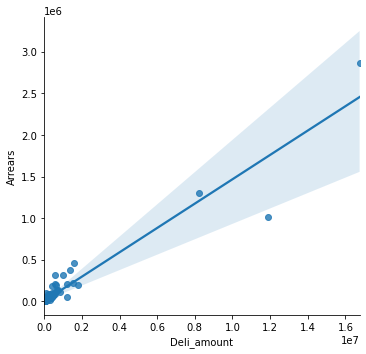

In [174]:
sns.lmplot(y='Arrears', x='Deli_amount',fit_reg=True, data=datagee)

In [130]:
datag=data.groupby("Client Employer").sum().sort_values(by="Arrears", ascending=False).head(50)            

In [132]:
datarr=data.groupby("Client Employer").mean().sort_values(by="Arrears", ascending=False).head(50)  

In [133]:
datag["Delinquency_per"]=datarr["Delinquency (%)"]

In [134]:
datag.head()

,No_of_actC,Loan_CA,Arrears,Delinquency (%),Actual_recieved,Delinquency_per
Client Employer,,,,,,
MINISTRY OF DEFENCE,256.250,836432.50,357592.47375,31.29250,8.292047e+05,31.29250
MINISTRY OF HEALTH & SOCIAL SERVICES,127.125,420131.25,163460.92875,30.53125,4.106893e+05,30.53125
GIPF / BENEFICIARIES,475.500,2215320.00,156456.06500,6.39500,2.936257e+06,6.39500
MINISTRY OF EDUCATION,510.375,2839648.75,127457.32750,6.54250,3.542991e+06,6.54250
MINISTRY OF SAFETY & SECURITY (POLICE),350.250,1480162.50,115694.55000,6.59750,1.869614e+06,6.59750


In [147]:
dat_amount= (datag["Delinquency_per"]/100)*(datag["Loan_CA"])

In [148]:
datag["Deli_amount"]=dat_amount

In [154]:
datag.head()

,No_of_actC,Loan_CA,Arrears,Delinquency (%),Actual_recieved,Delinquency_per,Deli_amount
Client Employer,,,,,,,
MINISTRY OF DEFENCE,256.250,836432.50,357592.47375,31.29250,8.292047e+05,31.29250,261740.640062
MINISTRY OF HEALTH & SOCIAL SERVICES,127.125,420131.25,163460.92875,30.53125,4.106893e+05,30.53125,128271.322266
GIPF / BENEFICIARIES,475.500,2215320.00,156456.06500,6.39500,2.936257e+06,6.39500,141669.714000
MINISTRY OF EDUCATION,510.375,2839648.75,127457.32750,6.54250,3.542991e+06,6.54250,185784.019469
MINISTRY OF SAFETY & SECURITY (POLICE),350.250,1480162.50,115694.55000,6.59750,1.869614e+06,6.59750,97653.720938


In [159]:
datag.cov()

,No_of_actC,Loan_CA,Arrears,Delinquency (%),Actual_recieved,Delinquency_per,Deli_amount
No_of_actC,1.198521e+04,5.692656e+07,4.227446e+06,-6.968293e+02,7.209301e+07,-6.968293e+02,4.142846e+06
Loan_CA,5.692656e+07,2.852489e+11,1.763934e+10,-3.647941e+06,3.623109e+11,-3.647941e+06,1.897865e+10
Arrears,4.227446e+06,1.763934e+10,3.363942e+09,-9.455239e+04,2.083093e+10,-9.455239e+04,2.717667e+09
Delinquency (%),-6.968293e+02,-3.647941e+06,-9.455239e+04,1.694549e+02,-4.717830e+06,1.694549e+02,-1.290821e+05
Actual_recieved,7.209301e+07,3.623109e+11,2.083093e+10,-4.717830e+06,4.624570e+11,-4.717830e+06,2.282669e+10
Delinquency_per,-6.968293e+02,-3.647941e+06,-9.455239e+04,1.694549e+02,-4.717830e+06,1.694549e+02,-1.290821e+05
Deli_amount,4.142846e+06,1.897865e+10,2.717667e+09,-1.290821e+05,2.282669e+10,-1.290821e+05,2.426051e+09


In [157]:
from scipy import stats
slope,intercept,r_value,p_value,std_err= stats.linregress(datag['Deli_amount'], datag['Arrears'])

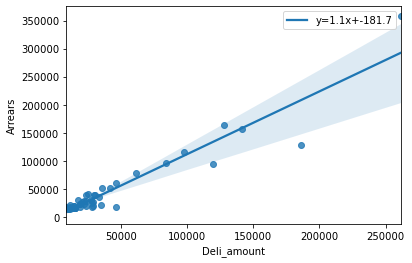

In [158]:
ax=sns.regplot(y='Arrears', x='Deli_amount',fit_reg=True,
           line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)},data=datag)
ax.legend()

<AxesSubplot:>

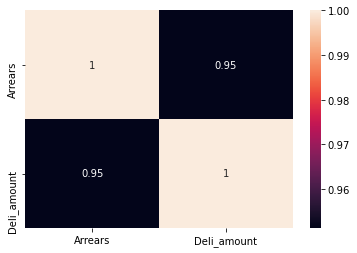

In [165]:
sns.heatmap(datag[['Arrears','Deli_amount']].corr(), annot=True)

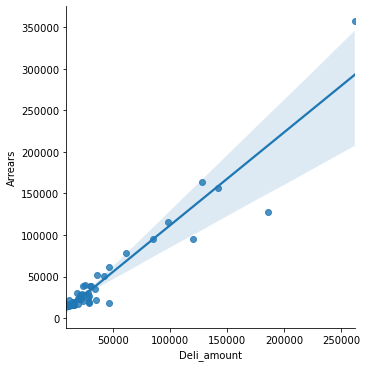

In [151]:
sns.lmplot(y='Arrears', x='Deli_amount',fit_reg=True, data=datag)

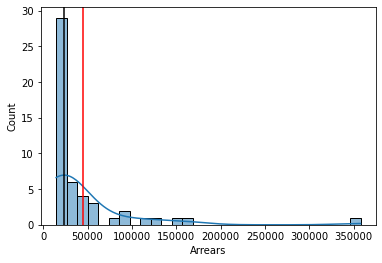

In [135]:
sns.histplot(datag["Arrears"], kde =True)
plt.axvline(datag["Arrears"].mean(), color="r")
plt.axvline(datag["Arrears"].median(), color="k")

In [139]:
from scipy import stats
slope,intercept,r_value,p_value,std_err= stats.linregress(datag['Delinquency (%)'], datag['Arrears'])

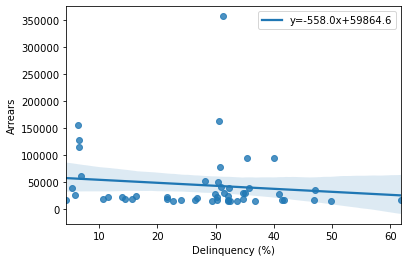

In [140]:
ax=sns.regplot(y='Arrears', x='Delinquency (%)',fit_reg=True, 
           line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)},data=datag)
ax.legend()

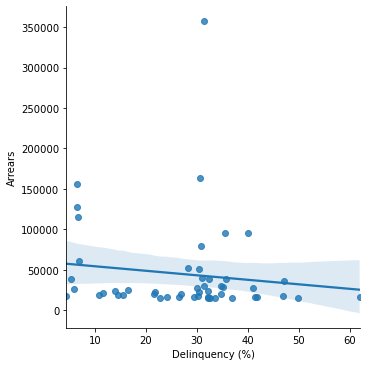

In [136]:
sns.lmplot(y='Arrears', x='Delinquency (%)',fit_reg=True, data=datag)

In [39]:
data1=data.groupby("Client Employer").sum().sort_values(by="Arrears", ascending=False).head(30)

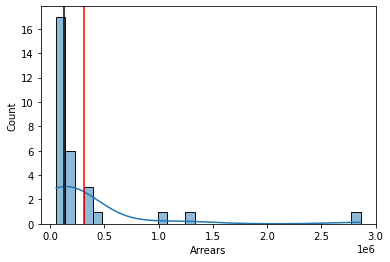

In [40]:
sns.histplot(data1["Arrears"], kde =True)
plt.axvline(data1["Arrears"].mean(), color="r")
plt.axvline(data1["Arrears"].median(), color="k")

In [21]:
sns.histplot?

In [41]:
data2=data.groupby("Client Employer").sum().sort_values(by="Delinquency (%)", ascending=False).head(30)

In [42]:
data2.head()

,No_of_actC,Loan_CA,Arrears,Delinquency (%),Actual_recieved
Client Employer,,,,,
FASHION RETAILERS,13,20510,12282.68,357.00,17071.66
MINISTRY OF WORKS AND TRANSPORT,167,472840,223581.02,327.66,436061.34
AFRICA PERSONNEL SERVICES,123,142920,71456.02,309.30,127325.63
TRANSNAMIB HOLDING LTD.,111,429550,213227.74,282.27,375047.49
CROSSROADS DISTRIBUTION NAMIBIA (PTY) LTD,15,42250,26529.54,276.95,41787.93


In [61]:
data2[["Loan_CA","Arrears","Delinquency (%)"]].corr()

,Loan_CA,Arrears,Delinquency (%)
Loan_CA,1.000000,0.999001,0.148733
Arrears,0.999001,1.000000,0.156969
Delinquency (%),0.148733,0.156969,1.000000


In [66]:
sns.heatmap?

<AxesSubplot:>

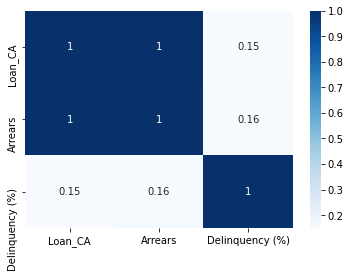

In [112]:
sns.heatmap(data2[["Loan_CA","Arrears","Delinquency (%)"]].corr(), annot=True, cmap="Blues")

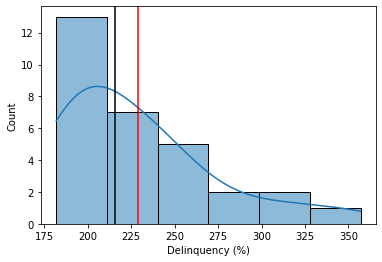

In [52]:

sns.histplot(data2["Delinquency (%)"], kde =True)
plt.axvline(data2["Delinquency (%)"].mean(), color="r")
plt.axvline(data2["Delinquency (%)"].median(), color="k")

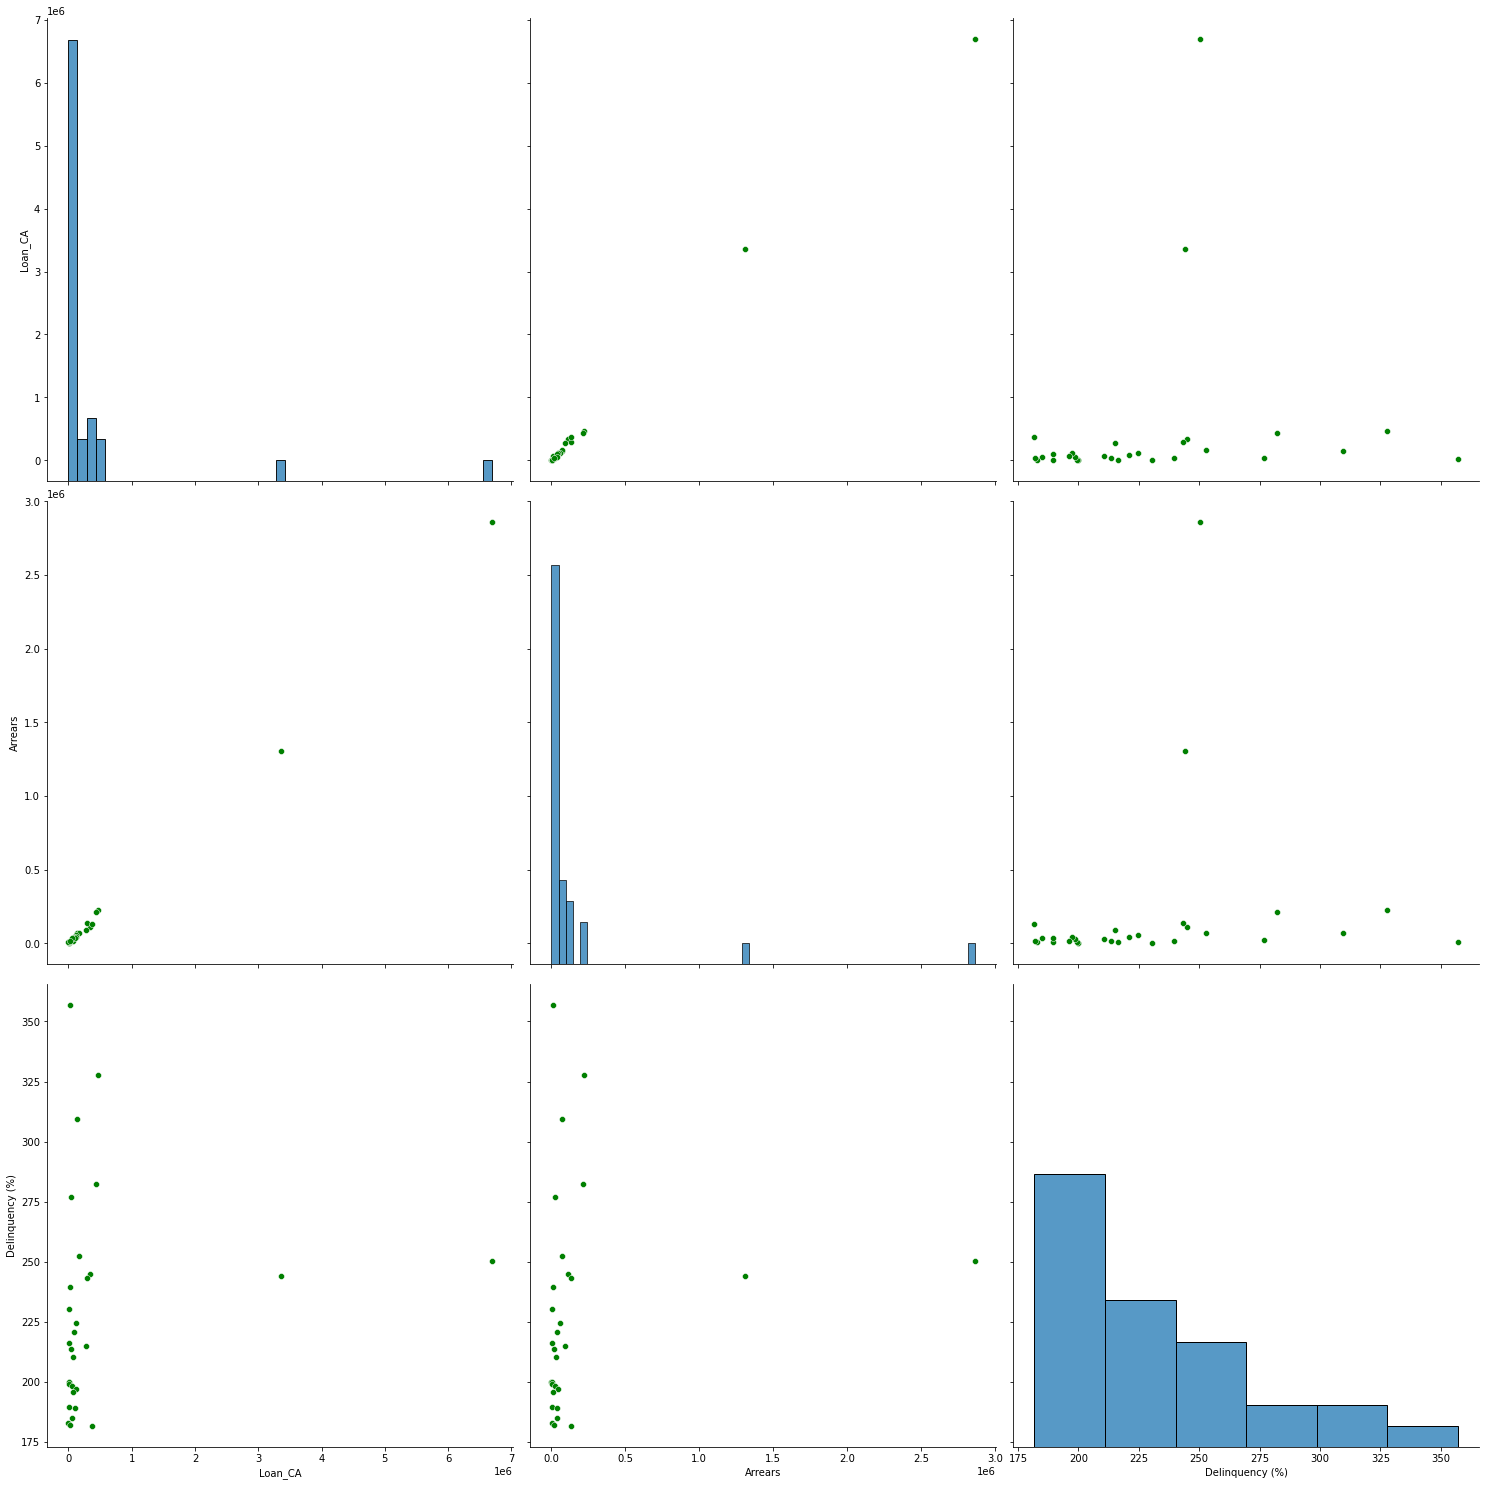

In [98]:
sns.pairplot(data2[["Loan_CA","Arrears","Delinquency (%)"]], plot_kws={'color':'g'},
                height=7)

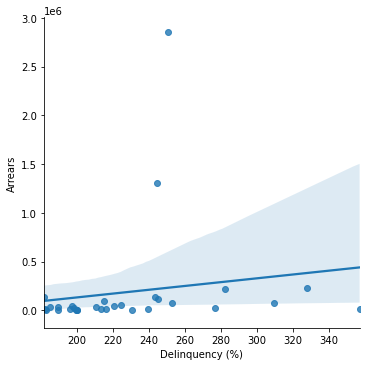

In [102]:
sns.lmplot(y='Arrears', x='Delinquency (%)',fit_reg=True, data=data2)

In [104]:
sns.regplot?

In [108]:
from scipy import stats
slope,intercept,r_value,p_value,std_err= stats.linregress(data2['Delinquency (%)'], data2['Arrears'])

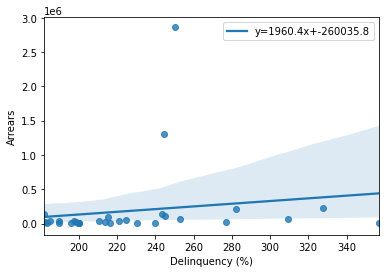

In [111]:
ax=sns.regplot(y='Arrears', x='Delinquency (%)',fit_reg=True, 
           line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)},data=data2)
ax.legend()

In [99]:
sns.lmplot?

In [90]:
sns.distplot?

C:\Users\USER 01\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


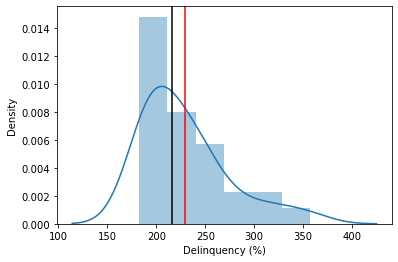

In [94]:
sns.distplot(data2["Delinquency (%)"], kde =True)
plt.axvline(data2["Delinquency (%)"].mean(), color="r")
plt.axvline(data2["Delinquency (%)"].median(), color="k")

In [55]:
mod=data2["Delinquency (%)"].mode()

In [56]:
mea=data2["Delinquency (%)"].mean()

In [57]:
st=data2["Delinquency (%)"].std()

In [58]:
skev=(mea-mod)/st

In [59]:
skev

0    0.643442
dtype: float64

In [85]:
data2["Delinquency (%)"].cov

<bound method Series.cov of Client Employer
FASHION RETAILERS                                       357.00
MINISTRY OF WORKS AND TRANSPORT                         327.66
AFRICA PERSONNEL SERVICES                               309.30
TRANSNAMIB HOLDING LTD.                                 282.27
CROSSROADS DISTRIBUTION NAMIBIA (PTY) LTD               276.95
MINISTRY OF URBAN AND RURAL DEVELOPMENT                 252.61
MINISTRY OF DEFENCE                                     250.34
MINISTRY OF JUSTICE                                     244.99
MINISTRY OF HEALTH & SOCIAL SERVICES                    244.25
MINISTRY OF ENVIRONMENT AND TOURISM                     243.26
SANLAM NAMIBIA HOLDINGS                                 239.71
BEST CHEER INVESTMENTS NAMIBIA                          230.41
MINISTRY OF FISHERIES AND MARINE RESOURCES              224.62
EAGLE NIGHT WATCH SECURITY CC                           220.79
TRIUMPHANT COLLEGE                                      216.31
MINISTRY OF

In [ ]:
data2["Delinquency (%)"].cov

In [ ]:
data2["Delinquency (%)"].cov

In [68]:
data.head(1)

,Client Employer,No_of_actC,Loan_CA,Arrears,Delinquency (%),Actual_recieved
0,ZIMMERMAN GARAGE (PTY) LTD,1,6650,2340.0,22.09,8255.01


In [71]:
data3=data.groupby("Client Employer").sum().sort_values(by="Delinquency (%)", ascending=False).head(30)

In [70]:
data3.head()

,No_of_actC,Loan_CA,Arrears,Delinquency (%),Actual_recieved
Client Employer,,,,,
!OANOB PRIVATE HOSPITAL,4,5800,3394.02,38.71,6803.34
#HOME,1,1300,3856.67,100.00,0.00
A VAN DER WALT TRANSPORT NAM (PTY) LTD,8,26350,9865.00,61.04,25778.03
A. WUTOW TRADING Co,19,72900,15019.97,195.92,74346.59
AAA TRADING ENTERPRISES CC,1,1850,1365.00,39.62,2080.00


In [77]:
data_co=data3=data.groupby("Client Employer").mean().sort_values(by="Delinquency (%)", ascending=False).head(30)

In [78]:
data_co

,No_of_actC,Loan_CA,Arrears,Delinquency (%),Actual_recieved
Client Employer,,,,,
PROTECTION ENGINEERING NAMIBIA,3.0,3900.0,3336.66,158.48,1200.00
PROTEA HOTEL WALVIS BAY,3.0,2900.0,1250.00,135.71,1170.00
OTJIWARONGO ART CENTRE,0.0,0.0,736.66,100.00,0.00
ONGENGE ENGLISH PRIVATE SCHOOL,1.0,1000.0,1300.00,100.00,0.00
RU-MAINE CLEARING AGENTS,1.0,2000.0,891.64,100.00,0.00
TSUMEB HOSPITAL HOLDINGS (PTY) LTD,1.0,2800.0,1246.01,100.00,0.00
OOSTHUISEN MOTORS,1.0,1600.0,693.33,100.00,0.00
NAM TRANSPORT AND ALLIED WORKERS,0.0,0.0,3163.33,100.00,0.00
CAFO-USAID,1.0,8500.0,11050.00,100.00,0.00


In [1]:
#data3['Delinquency_p(%)']=data_co["Delinquency (%)"]